# 1 Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Display Data and load CreditCard Data

In [4]:
data = pd.read_csv('creditcard.csv')

In [35]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [11]:
#sc = StandardScaler()
#data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [51]:
#data.head()

In [6]:
data = data.drop(['Time'],axis=1)

In [14]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
data.shape

(284807, 30)

In [19]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Check For Duplicates

In [7]:
data.duplicated().any()

True

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(275663, 30)

In [25]:
284807- 275663

9144

# Data highly Imbalanced

In [162]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

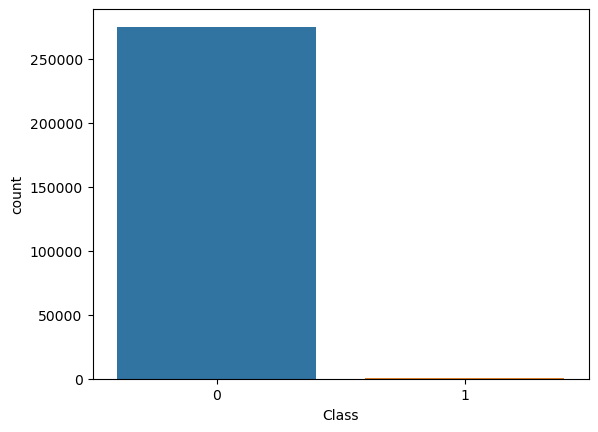

In [27]:
sns.countplot(data['Class'])

In [10]:
X = data.drop('Class',axis=1)
y = data['Class']

In [11]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42,stratify=y )

In [14]:
sc = StandardScaler()
X_train['Amount']=sc.fit_transform(pd.DataFrame(X_train['Amount']))

In [15]:
sc = StandardScaler()
X_test['Amount']=sc.fit_transform(pd.DataFrame(X_test['Amount']))

In [16]:
X_train.shape

(220530, 29)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,57873.0,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,0.909212
265736,162025.0,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,-0.218631
42801,41251.0,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,-0.271442
172689,121201.0,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,-0.325679
179949,124306.0,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,-0.311060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120348,75794.0,-0.188193,-3.244306,-1.083455,0.136170,-1.626809,-0.517792,0.786109,-0.401554,-0.642671,...,1.137602,0.011795,-1.341362,-0.791988,-0.064471,0.141139,1.038062,-0.238098,0.136452,3.014509
260136,159419.0,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,...,0.045101,-0.326673,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,-0.347112
132427,79983.0,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,...,-0.003257,0.070189,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,-0.332810
147428,88536.0,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,...,-0.110161,-0.212230,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,-0.194227


In [18]:
X_train = X_train.drop(['Time'],axis=1)

In [56]:
X_test = X_test.drop(['Time'],axis=1)

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

# Random Forest without Sampling

In [61]:
rf = RandomForestClassifier(n_estimators=100,max_depth= 12, random_state=13, criterion='gini')


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

In [62]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, random_state=13)

In [64]:
y_pred = rf.predict(X_test)

In [67]:
y_pred_train = rf.predict(X_train)

In [ ]:
#Tain dataset

In [75]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm1 = confusion_matrix(y_train, y_pred_train, labels=rf.classes_)

rf_Recall1 = recall_score(y_train, y_pred_train)
rf_Precision1 = precision_score(y_train, y_pred_train)
rf_f11 = f1_score(y_train, y_pred_train)
rf_accuracy1 = accuracy_score(y_train, y_pred_train)

print(cm1)

[[226597      0]
 [    56    327]]


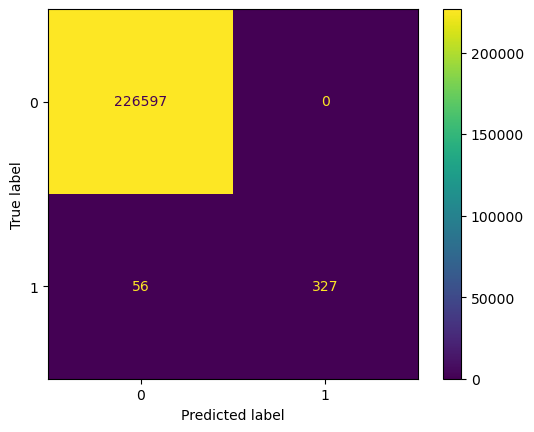

In [76]:
#plt.matshow(cm1,annot=True)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=rf.classes_)
disp.plot()

plt.show()


In [ ]:
#Testdata

In [77]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred,labels=rf.classes_)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[56654     2]
 [   25    65]]


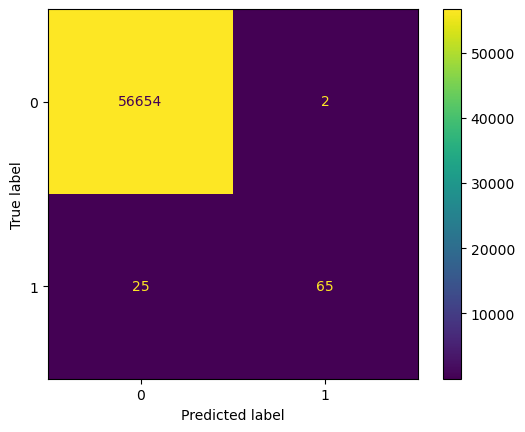

In [78]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [66]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.722222,0.970149,0.828025,0.999524


# SMOTE (Synthetic Minority Oversampling Technique)

In [81]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline


smote_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators=100,max_depth= 12, random_state=13, criterion='gini'))

In [82]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=12, random_state=13))])

In [89]:
y_pred = smote_pipeline.predict(X_test)

In [ ]:
# Train data 

In [94]:
y_pred_train = smote_pipeline.predict(X_train)

In [95]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm1 = confusion_matrix(y_train, y_pred_train, labels=rf.classes_)

rf_Recall1 = recall_score(y_train, y_pred_train)
rf_Precision1 = precision_score(y_train, y_pred_train)
rf_f11 = f1_score(y_train, y_pred_train)
rf_accuracy1 = accuracy_score(y_train, y_pred_train)

print(cm1)

[[226395    202]
 [     2    381]]


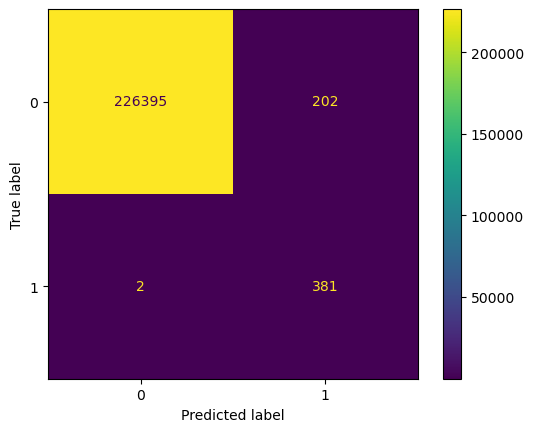

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=rf.classes_)
disp.plot()

plt.show()


In [ ]:
#Test data

In [92]:
cm = confusion_matrix(y_test, y_pred,labels=rf.classes_)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[56609    47]
 [   18    72]]


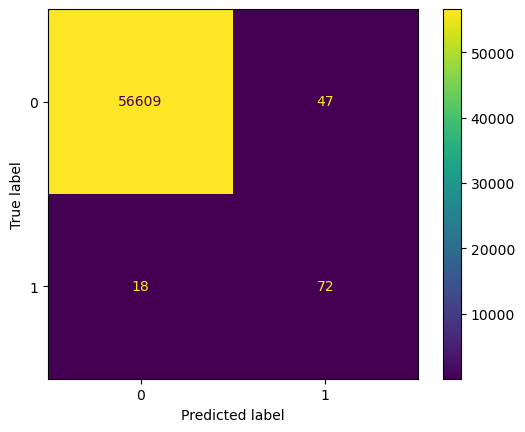

In [93]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [91]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.8,0.605042,0.688995,0.998855


# Combining SMOTE and Tomek Links

In [21]:
from imblearn.pipeline import Pipeline, make_pipeline

In [22]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
tomekU = TomekLinks()

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), RandomForestClassifier(n_estimators=100,max_depth= 12, random_state=13, criterion='gini'))

In [23]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=12, random_state=13))])

In [ ]:
# Train data

In [32]:
y_pred_train = SMOTETomek_rf.predict(X_train)

In [33]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm1 = confusion_matrix(y_train, y_pred_train, labels=SMOTETomek_rf.classes_)

rf_Recall1 = recall_score(y_train, y_pred_train)
rf_Precision1 = precision_score(y_train, y_pred_train)
rf_f11 = f1_score(y_train, y_pred_train)
rf_accuracy1 = accuracy_score(y_train, y_pred_train)

print(cm1)

[[219960    188]
 [     2    380]]


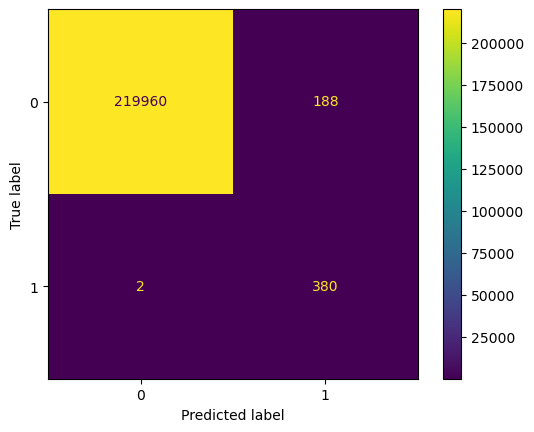

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=SMOTETomek_rf.classes_)
disp.plot()

plt.show()

In [ ]:
#Test Data

In [24]:
y_pred = SMOTETomek_rf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

cm = confusion_matrix(y_test, y_pred,labels=SMOTETomek_rf.classes_)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[54986    56]
 [   18    73]]


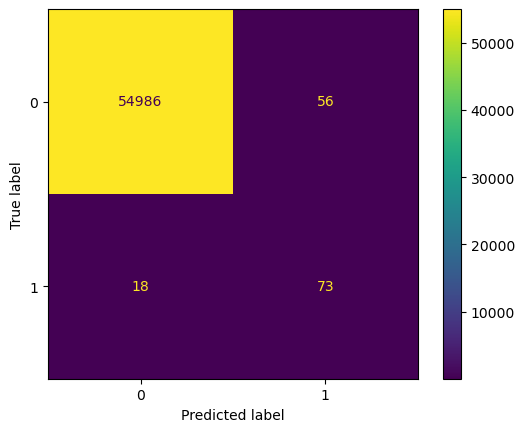

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SMOTETomek_rf.classes_)
disp.plot()

plt.show()

In [31]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.802198,0.565891,0.663636,0.998658


# Deep Neural Networks 

In [36]:
from keras import models, layers

In [37]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
from sklearn.metrics import classification_report

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [39]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
3446/3446 [==============================] - 18s 5ms/step - loss: 0.0157
Epoch 2/100
3446/3446 [==============================] - 16s 5ms/step - loss: 0.0056
Epoch 3/100
3446/3446 [==============================] - 15s 4ms/step - loss: 0.0053
Epoch 4/100
3446/3446 [==============================] - 16s 5ms/step - loss: 0.0048
Epoch 5/100
3446/3446 [==============================] - 16s 5ms/step - loss: 0.0047
Epoch 6/100
3446/3446 [==============================] - 15s 4ms/step - loss: 0.0045
Epoch 7/100
3446/3446 [==============================] - 14s 4ms/step - loss: 0.0046
Epoch 8/100
3446/3446 [==============================] - 13s 4ms/step - loss: 0.0045
Epoch 9/100
3446/3446 [==============================] - 16s 5ms/step - loss: 0.0044
Epoch 10/100
3446/3446 [==============================] - 14s 4ms/step - loss: 0.0047
Epoch 11/100
3446/3446 [==============================] - 15s 4ms/step - loss: 0.0046
Epoch 12/100
3446/3446 [==============================] - 15s 4

In [40]:
y_predictions = model.predict(X_test)

In [41]:
y_predictions

array([[1.1201913e-06],
       [1.0204174e-12],
       [1.3235230e-21],
       ...,
       [5.4296137e-11],
       [5.4819673e-05],
       [6.9798654e-07]], dtype=float32)

In [42]:
preds = np.around(y_predictions)

In [43]:
preds


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [44]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.76      0.77      0.77        91

    accuracy                           1.00     55133
   macro avg       0.88      0.88      0.88     55133
weighted avg       1.00      1.00      1.00     55133



In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.8844155372261183

# Imbalanced Data Handling with Deep Neural Network

In [52]:
y_train.value_counts()

0    220152
1       378
Name: Class, dtype: int64

In [53]:
y_test.value_counts()

0    55038
1       95
Name: Class, dtype: int64

There are 378 1's (frauds) and 220152 0's (non-frauds)

220152/378 = 582

0's are 582 times more than 1's

we can assign custom weights to NN accordingly

In [54]:
weights = {
    0:1,
    1:582
}

In [55]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

# CHANGE
history = model.fit(X_train, y_train, epochs=100, class_weight=weights)

Epoch 1/100
6892/6892 [==============================] - 16s 2ms/step - loss: 11.1769
Epoch 2/100
6892/6892 [==============================] - 14s 2ms/step - loss: 13.3675
Epoch 3/100
6892/6892 [==============================] - 11s 2ms/step - loss: 5.9506
Epoch 4/100
6892/6892 [==============================] - 10s 2ms/step - loss: 5.2554
Epoch 5/100
6892/6892 [==============================] - 11s 2ms/step - loss: 7.0719
Epoch 6/100
6892/6892 [==============================] - 15s 2ms/step - loss: 6.3254
Epoch 7/100
6892/6892 [==============================] - 14s 2ms/step - loss: 5.3422
Epoch 8/100
6892/6892 [==============================] - 13s 2ms/step - loss: 7.5327
Epoch 9/100
6892/6892 [==============================] - 13s 2ms/step - loss: 7.2442
Epoch 10/100
6892/6892 [==============================] - 12s 2ms/step - loss: 7.0070
Epoch 11/100
6892/6892 [==============================] - 12s 2ms/step - loss: 7.4238
Epoch 12/100
6892/6892 [==============================] - 14s

In [57]:
predictions = model.predict(X_test)

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predictions)

0.9040717322577128

In [60]:
preds = np.around(y_predictions)

In [63]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.00      0.00      0.00        95

    accuracy                           1.00     55133
   macro avg       0.50      0.50      0.50     55133
weighted avg       1.00      1.00      1.00     55133



In [64]:
cm = confusion_matrix(y_test, preds)
print(cm)


[[54946    92]
 [   95     0]]


# LSTM-Attention model

In [65]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [66]:
datanew = pd.read_csv('creditcard.csv', na_filter=True)
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [68]:
tr_data = datanew.drop(col_del,axis =1)
tr_data.shape

(284807, 10)

In [69]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [70]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [71]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 284315})


In [72]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3,stratify=y)

In [76]:
X_train.shape

(398041, 9)

In [77]:
X_test.shape

(170589, 9)

In [78]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [90]:
inputs=Input((1,9))
x1=LSTM(50,dropout=0.3,recurrent_dropout=0.2,return_sequences=True)(inputs)
x2=LSTM(50,dropout=0.3,recurrent_dropout=0.2,return_sequences=True)(x1)
outputs=Dense(1,activation='sigmoid')(x2)
model=Model(inputs,outputs)

In [91]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
20/20 [==============================] - 10s 308ms/step - loss: 0.6761 - accuracy: 0.7490 - val_loss: 0.6415 - val_accuracy: 0.8864
Epoch 2/100
20/20 [==============================] - 5s 272ms/step - loss: 0.5970 - accuracy: 0.8811 - val_loss: 0.5248 - val_accuracy: 0.8895
Epoch 3/100
20/20 [==============================] - 6s 287ms/step - loss: 0.4735 - accuracy: 0.8833 - val_loss: 0.4041 - val_accuracy: 0.8921
Epoch 4/100
20/20 [==============================] - 6s 299ms/step - loss: 0.3696 - accuracy: 0.8898 - val_loss: 0.3165 - val_accuracy: 0.9026
Epoch 5/100
20/20 [==============================] - 5s 268ms/step - loss: 0.3010 - accuracy: 0.9011 - val_loss: 0.2658 - val_accuracy: 0.9087
Epoch 6/100
20/20 [==============================] - 6s 294ms/step - loss: 0.2644 - accuracy: 0.9087 - val_loss: 0.2369 - val_accuracy: 0.9107
Epoch 7/100
20/20 [==============================] - 6s 294ms/step - loss: 0.2433 - accuracy: 0.9136 - val_loss: 0.2168 - val_accuracy: 0.915

In [94]:
model.save('Save_Model.h5')

In [95]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('Save_Model.h5')
# summarize model.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 9)]            0         
                                                                 
 lstm_20 (LSTM)              (None, 1, 50)             12000     
                                                                 
 lstm_21 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dense_8 (Dense)             (None, 1, 1)              51        
                                                                 
Total params: 32,251
Trainable params: 32,251
Non-trainable params: 0
_________________________________________________________________


In [96]:
# evaluate the model
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.938, Test: 0.937


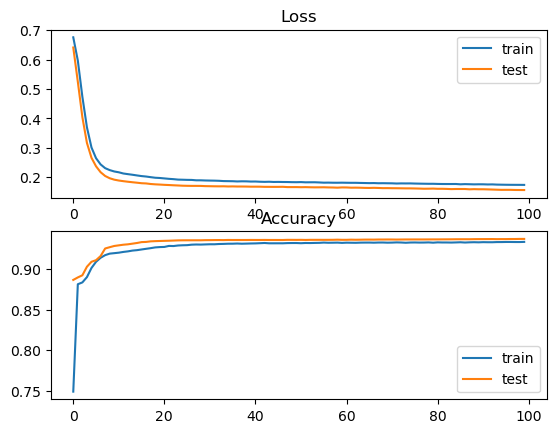

In [97]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [98]:
# predict probabilities for test set
yhat_probs = model.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [100]:
yhat_probs = np.around(yhat_probs)

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs)
print('Recall: %f' % recall)


Accuracy: 0.936836
Precision: 0.987837
Recall: 0.884565


In [102]:
cm = confusion_matrix(y_test, yhat_probs)
print(cm)

[[84365   929]
 [ 9846 75449]]


In [103]:
print(classification_report(y_test, yhat_probs))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     85294
           1       0.99      0.88      0.93     85295

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



In [104]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [105]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']

Confusion matrix, without normalization
[[84365   929]
 [ 9846 75449]]


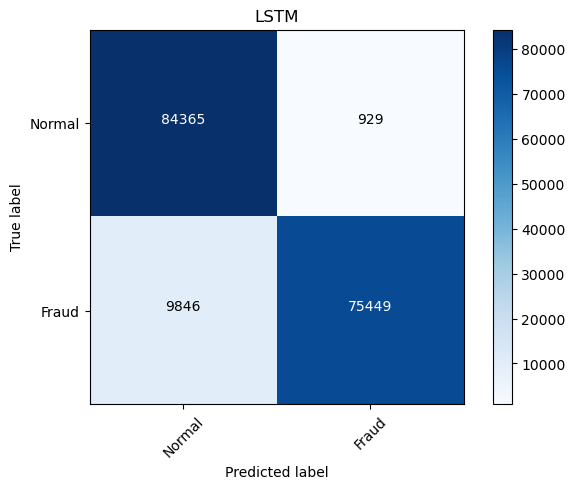

In [106]:
plot_confusion_matrix(cm=cm, classes=labels, title='LSTM')

# Using Attention

In [107]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [108]:
inputs1=Input((1,9))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [109]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
history1=model1.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=30000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
14/14 [==============================] - 13s 522ms/step - loss: 0.6838 - accuracy: 0.6912 - val_loss: 0.6618 - val_accuracy: 0.8764
Epoch 2/100
14/14 [==============================] - 7s 475ms/step - loss: 0.6424 - accuracy: 0.8789 - val_loss: 0.6048 - val_accuracy: 0.8877
Epoch 3/100
14/14 [==============================] - 7s 469ms/step - loss: 0.5755 - accuracy: 0.8811 - val_loss: 0.5189 - val_accuracy: 0.8861
Epoch 4/100
14/14 [==============================] - 6s 465ms/step - loss: 0.4876 - accuracy: 0.8801 - val_loss: 0.4297 - val_accuracy: 0.8868
Epoch 5/100
14/14 [==============================] - 7s 468ms/step - loss: 0.4047 - accuracy: 0.8831 - val_loss: 0.3544 - val_accuracy: 0.8934
Epoch 6/100
14/14 [==============================] - 7s 471ms/step - loss: 0.3393 - accuracy: 0.8913 - val_loss: 0.3006 - val_accuracy: 0.9025
Epoch 7/100
14/14 [==============================] - 7s 468ms/step - loss: 0.2968 - accuracy: 0.8997 - val_loss: 0.2693 - val_accuracy: 0.907

In [115]:
# save Attention model and architecture to single file
model1.save('Save_Model_Attention.h5')
print("Saved model to disk")

Saved model to disk


In [118]:
_, train_acc = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.937, Test: 0.936


In [119]:
# predict probabilities for test set
yhat_probs1 = model1.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs1 = yhat_probs1[:, 0]

In [120]:
yhat_probs1 = np.around(yhat_probs1)

In [121]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_probs1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs1)
print('Recall: %f' % recall)

Accuracy: 0.936344
Precision: 0.990575
Recall: 0.881072


In [122]:
cm1 = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs1)

Confusion matrix, without normalization
[[84579   715]
 [10144 75151]]


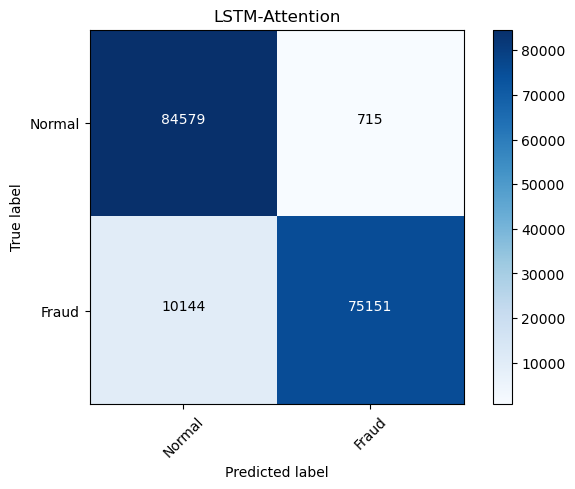

In [123]:
plot_confusion_matrix(cm=cm1, classes=labels, title='LSTM-Attention', normalize=False)

In [124]:
print(classification_report(y_test, yhat_probs1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     85294
           1       0.99      0.88      0.93     85295

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



# Using one of the saved Model for UI

In [ ]:
from imblearn.over_sampling import SMOTE

In [128]:
X_res,y_res = SMOTE().fit_resample(X_train,y_train)

In [129]:
y_res.value_counts()

1    199021
0    199021
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

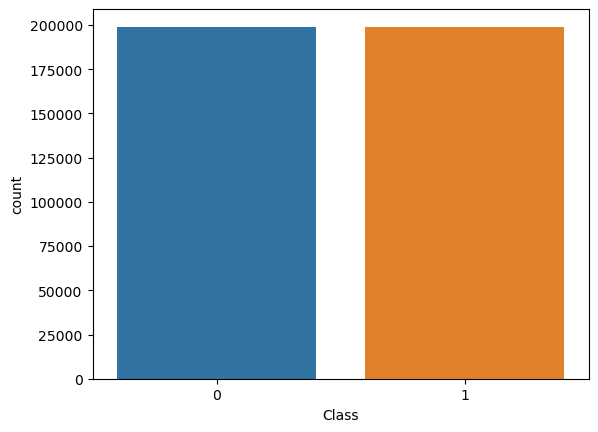

In [164]:
sns.countplot(y_res)

In [130]:
rf = RandomForestClassifier()
rf.fit(X_res,y_res)

RandomForestClassifier()

In [131]:
y_pred3 = rf.predict(X_test)

In [132]:
accuracy_score(y_test,y_pred3)

0.9997010358229429

In [133]:
precision_score(y_test,y_pred3)

0.9994258395631693

In [134]:
recall_score(y_test,y_pred3)

0.9999765519667038

In [135]:
f1_score(y_test,y_pred3)

0.9997011199212362

In [136]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [137]:
cm1 = confusion_matrix(y_true=y_test, y_pred=y_pred3)

Confusion matrix, without normalization
[[85245    49]
 [    2 85293]]


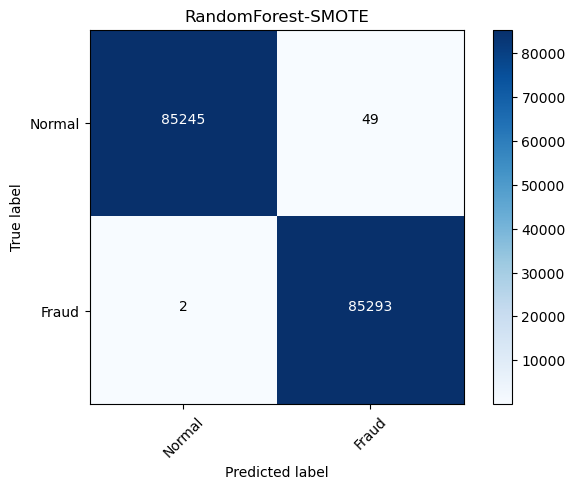

In [138]:
plot_confusion_matrix(cm=cm1, classes=labels, title='RandomForest-SMOTE', normalize=False)

In [149]:
pred = rf.predict([[0.346834,-0.222880,0.673149,-0.597217,0.404640,-0.801208,0.535493,0.594093,0.620466]])

In [150]:
pred

array([1], dtype=int64)

In [151]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Fraudulent Transcation


In [147]:
#df = pd.DataFrame(X_train)

In [161]:
#df

In [153]:
import joblib

In [154]:
joblib.dump(rf,"credit_card_model")

['credit_card_model']

In [155]:
model_rf = joblib.load("credit_card_model")

# GUI Application

In [160]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())



    model_rf = joblib.load('credit_card_model')
    y_pred = model_rf.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of  Amount of Transaction").grid(row=1)
Label(master, text="Enter value of  Avg monthly Transaction").grid(row=2)
Label(master, text="Enter value of Avg yearly Transaction").grid(row=3)
Label(master, text="Enter value of Longitude Location of Merchant").grid(row=4)
Label(master, text="Enter value of Latitude Location of Merchant").grid(row=5)
Label(master, text="Enter value of UNIX Time of transaction").grid(row=6)

Label(master, text="Enter value of Credit Card Holder's City Population").grid(row=7)
Label(master, text="Enter value of long - Longitude Location of Credit Card Holder").grid(row=8)
Label(master, text="Enter value of lat - Latitude Location of Credit Card Holder").grid(row=9)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )

######################################
Credit Card Fraud Detection System ['Fraudulent Transcation']
######################################
